In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from interstellar import Tracks, DenseNetwork, set_seed
import os

In [2]:
seed = 101
name = 'network_08'
tracks = 'tracks_04b'
save_path = f'/home/ADF/ajl573/Data/interstellar_data/{name}'
load_path = f'/home/ADF/ajl573/Data/interstellar_data/{tracks}'

In [3]:
if not os.path.exists(save_path):
    os.mkdir(save_path)

In [4]:
train = pd.read_csv(f'{load_path}/{tracks}_train.csv')

In [5]:
len(train)

7735733

In [6]:
t = Tracks(name=tracks)
t.set_data(train.sample(7735500, random_state=seed))

del train

In [7]:
t.get_data().head()

,evol_stage,initial_mass,initial_Yinit,initial_feh,initial_MLT,frac_age,effective_T,luminosity,log_g,surface_he4,surface_Z,star_feh,delta_nu_fit,initial_Zinit,gradient,log_star_age,log_radius
5933768,1,1.17,0.24,-0.2,1.5,0.381987,6180.6750,2.203866,4.280516,0.121770,0.004602,-0.536008,97.249210,0.008581,0.000138,0.219018,0.112780
334900,1,1.16,0.28,-0.3,1.7,0.996618,6587.1980,4.786881,4.050493,0.149323,0.003788,-0.607039,63.997060,0.006473,0.000463,0.490498,0.225884
7135268,2,1.18,0.28,-0.1,2.3,1.022719,6349.7030,4.278201,4.042870,0.184591,0.007162,-0.310150,65.216125,0.010205,0.000369,0.568727,0.233383
3251278,1,0.81,0.24,0.4,2.5,0.545067,4438.7354,0.223159,4.540280,0.201984,0.028536,0.311528,171.295750,0.033051,0.000317,1.309384,-0.096953
1224838,2,1.12,0.32,0.2,1.9,1.269763,5169.1978,3.214738,3.786232,0.309476,0.018507,0.182351,43.206272,0.018963,0.001241,0.760349,0.349985


In [8]:
len(t._data)

7735500

## Normalize

Let's choose the inputs and outputs and the normalise

In [9]:
x_cols = ['frac_age', 'initial_mass', 'initial_MLT', 'initial_Yinit', 'initial_Zinit']
y_cols = ['log_star_age', 'effective_T', 'log_radius', 'delta_nu_fit', 'star_feh']

In [10]:
factors, _df = t.normalize(loc='mean', scale='std', columns=x_cols+y_cols)

In [11]:
factors

,column,norm_column,loc,scale
0,frac_age,frac_age_norm,0.807264,0.414357
1,initial_mass,initial_mass_norm,0.997338,0.117963
2,initial_MLT,initial_MLT_norm,1.996954,0.337990
3,initial_Yinit,initial_Yinit_norm,0.279594,0.028033
4,initial_Zinit,initial_Zinit_norm,0.018303,0.010686
5,log_star_age,log_star_age_norm,0.727604,0.466882
6,effective_T,effective_T_norm,5569.763832,601.275379
7,log_radius,log_radius_norm,0.117955,0.146779
8,delta_nu_fit,delta_nu_fit_norm,99.854229,42.580915
9,star_feh,star_feh_norm,-0.021189,0.360914


Round the loc and scale to 3 dp

In [12]:
factors = round(factors, 3)

In [13]:
factors

,column,norm_column,loc,scale
0,frac_age,frac_age_norm,0.807,0.414
1,initial_mass,initial_mass_norm,0.997,0.118
2,initial_MLT,initial_MLT_norm,1.997,0.338
3,initial_Yinit,initial_Yinit_norm,0.280,0.028
4,initial_Zinit,initial_Zinit_norm,0.018,0.011
5,log_star_age,log_star_age_norm,0.728,0.467
6,effective_T,effective_T_norm,5569.764,601.275
7,log_radius,log_radius_norm,0.118,0.147
8,delta_nu_fit,delta_nu_fit_norm,99.854,42.581
9,star_feh,star_feh_norm,-0.021,0.361


In [14]:
factors, _df = t.normalize(loc=factors['loc'].to_numpy(), scale=factors['scale'].to_numpy(),
                           columns=x_cols+y_cols)
_df.head()

,frac_age_norm,initial_mass_norm,initial_MLT_norm,initial_Yinit_norm,initial_Zinit_norm,log_star_age_norm,effective_T_norm,log_radius_norm,delta_nu_fit_norm,star_feh_norm
5933768,-1.026600,1.466102,-1.470414,-1.428571,-0.856232,-1.089898,1.016026,-0.035513,-0.061173,-1.426616
334900,0.458014,1.381356,-0.878698,0.000000,-1.047931,-0.508570,1.692128,0.733903,-0.842088,-1.623377
7135268,0.521060,1.550847,0.896450,0.000000,-0.708640,-0.341055,1.297142,0.784916,-0.813458,-0.800970
3251278,-0.632689,-1.584746,1.488166,-1.428571,1.368259,1.244934,-1.881050,-1.462265,1.677785,0.921130
1224838,1.117784,1.042373,-0.286982,1.428571,0.087535,0.069269,-0.666195,1.578132,-1.330352,0.563298


In [15]:
del _df

In [16]:
t.normalize(loc=factors['loc'].to_numpy(), scale=factors['scale'].to_numpy(),
                           columns=x_cols+y_cols, inplace=True)

In [17]:
t.norm_factors.to_csv(os.path.join(save_path, 'tracks_04b_norm.csv'), index=False)

In [18]:
train = t.get_data([f'{col}_norm' for col in x_cols+y_cols]+['gradient'])
train.head()

,frac_age_norm,initial_mass_norm,initial_MLT_norm,initial_Yinit_norm,initial_Zinit_norm,log_star_age_norm,effective_T_norm,log_radius_norm,delta_nu_fit_norm,star_feh_norm,gradient
5933768,-1.026600,1.466102,-1.470414,-1.428571,-0.856232,-1.089898,1.016026,-0.035513,-0.061173,-1.426616,0.000138
334900,0.458014,1.381356,-0.878698,0.000000,-1.047931,-0.508570,1.692128,0.733903,-0.842088,-1.623377,0.000463
7135268,0.521060,1.550847,0.896450,0.000000,-0.708640,-0.341055,1.297142,0.784916,-0.813458,-0.800970,0.000369
3251278,-0.632689,-1.584746,1.488166,-1.428571,1.368259,1.244934,-1.881050,-1.462265,1.677785,0.921130,0.000317
1224838,1.117784,1.042373,-0.286982,1.428571,0.087535,0.069269,-0.666195,1.578132,-1.330352,0.563298,0.001241


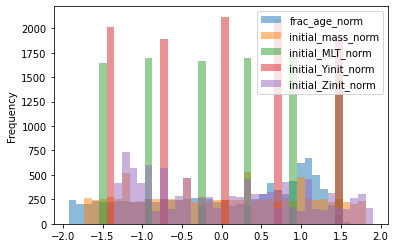

In [19]:
train.sample(n=10000).plot(kind='hist', y=[f'{col}_norm' for col in x_cols], bins=40, alpha=0.5)

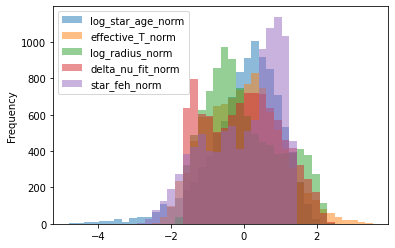

In [20]:
train.sample(n=10000).plot(kind='hist', y=[f'{col}_norm' for col in y_cols], bins=40, alpha=0.5)

Normalise training weights such that they are of order 1

In [21]:
train['weight'] = train['gradient']/train['gradient'].std()

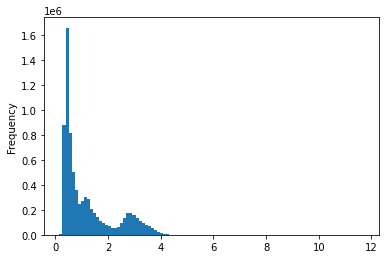

In [22]:
train['weight'].plot(kind='hist', bins=100)

Validation

In [23]:
val = pd.read_csv(f'{load_path}/{tracks}_val.csv')

In [24]:
t = Tracks()
t.set_data(val)

In [25]:
t.normalize(loc=factors['loc'].to_numpy(), scale=factors['scale'].to_numpy(),
            columns=x_cols+y_cols, inplace=True)

In [26]:
val = t.get_data([f'{col}_norm' for col in x_cols+y_cols])
val.head()

,frac_age_norm,initial_mass_norm,initial_MLT_norm,initial_Yinit_norm,initial_Zinit_norm,log_star_age_norm,effective_T_norm,log_radius_norm,delta_nu_fit_norm,star_feh_norm
0,-1.894701,0.025424,0.89645,-1.428571,-0.657099,-3.035447,0.324335,-1.197201,1.530781,-0.225741
1,-1.807178,0.025424,0.89645,-1.428571,-0.657099,-2.145522,0.337958,-1.169027,1.476221,-0.238075
2,-1.773367,0.025424,0.89645,-1.428571,-0.657099,-1.947024,0.343372,-1.159455,1.457834,-0.242870
3,-1.766615,0.025424,0.89645,-1.428571,-0.657099,-1.911994,0.344456,-1.157568,1.454220,-0.243819
4,-1.739636,0.025424,0.89645,-1.428571,-0.657099,-1.783885,0.348781,-1.150079,1.439909,-0.247589


In [27]:
del t

In [28]:
x_cols = [f'{col}_norm' for col in x_cols]
y_cols = [f'{col}_norm' for col in y_cols]

In [29]:
print(f'Length of training data = {len(train)}')
print(f'Length of validation data = {len(val)}')

Length of training data = 7735500
Length of validation data = 1933933


In [30]:
network = DenseNetwork.from_config(f'{save_path}/{name}_config.json')
network.load_model()
network.load_history()
network.model.summary()

Model: "network_08"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          [(None, 5)]               0         
_________________________________________________________________
dense (Dense)                (None, 128)               768       
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_5 (Dense)              (None, 128)               1

In [31]:
fit_kw = {'sample_weight': train['weight'].to_numpy()}

In [ ]:
network.train(train, network.x_cols, network.y_cols, epochs=20000, validation_split=None, validation_data=val,
              callbacks=['checkpoint', 'tensorboard'], fit_kw=fit_kw)

  ...
    to  
  ['...']


In [ ]:
network.save()

In [ ]:
network.plot_metric(val.sample(20000), metric='absolute_error');

In [ ]:
network.plot_metric(val.sample(20000), metric='error');

In [ ]:
scores = network.scores(val.sample(20000))
scores

In [ ]:
scale_scores = factors.loc[5:, 'scale'].to_numpy() * scores

In [ ]:
log_cols = [col for col in scale_scores.columns if 'log' in col]
log_cols

scale_scores[[col[4:] for col in log_cols]] = scale_scores[log_cols] * np.log(10.0)

scale_scores.loc['std'].round(5)